## Basic Plotting with Matplotlib

__Back-end Details:__

1. __%matplotlib inline magic   :__ It is not interacttive.So, subsequent calls create new plots as new calls in the notebook.
2. __%matplotlib notebook magic :__ It is interactive.

In [39]:
%matplotlib notebook

In [40]:
import matplotlib as mpl

In [41]:
#Backend Layer
mpl.get_backend()

'nbAgg'

Firstly, let's input the __pyplot__ scripting layer as __plt.__

All of the functions which will run against the Pyplot module are part of the scripting layer of the architecture.

In [42]:
import matplotlib.pyplot as plt

Let's take a look at the plot function by looking at the __docstring.__

In [43]:
plt.plot?

Python function declaration with two arguments, __the star args__, and the __double star kwargs__ can be a bit obscure.

- What's being said by the star args is that the function supports any number of unnamed arguments. 
- The double star keyword args also means that it supports any number of named arguments.

This makes the function declaration very flexible since you can pass in basically any number of arguments, named or not, but it makes it difficult to know what is an appropriate argument.

<IPython.core.display.Javascript object>


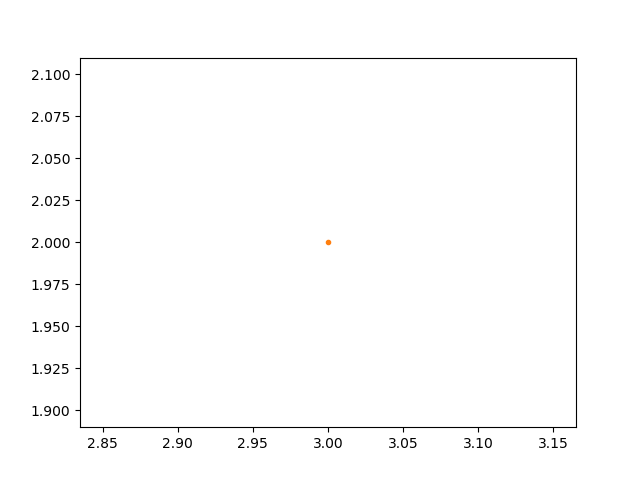

In [44]:
plt.plot(3,2)

We can't see any data point above.

So the third argument should be a string which signifies how we want that data point to be rendered.

In [45]:
plt.plot(3,2,'.')

It can be noticed that the subsequent calls to plot have actually updated our visualization.

This is a particular feature of this interactive backend, other backends might not.



The __pyplot scripting interface__ manages a lot of objects. It keeps track of the latest figure of subplots, and of the axis objects. Moreover, it actually hides some of these behind methods of its own. So the pyplot module itself has a function which is called __plot__, but it redirects calls to this function to the current axes object. 

So,let's take a look at a comparable approach that's a bit more verbose, and some people would call this the matplotlib object API, but it's more accurate to think of it as directly interfacing with the Artist layer instead.

In [46]:
from matplotlib.backends.backend_agg import FigureCanvasAgg    # importing new back-end
from matplotlib.figure import Figure    # importing figure object

# Create a new figure and associate it with the back-end
fig =  Figure() 
canvas = FigureCanvasAgg(fig)

# Add a sub-plot
# 111 means only one plot
ax = fig.add_subplot(111)    # The return value of sub-plot is the axes object which contains methods for plotting

ax.plot(3,2,'.')

# The backend that we're using, the one for the Jupyter Notebooks, isn't able to render this directly, 
# since it expects the scripting layer, pyplot, to have created all of the objects.
# So here we'll save the figure to a png file instead.
canvas.print_png('test.png')

# Then, we'll do a quick HTML cell magic, and execute that and see the rendered image.

In [47]:
%%html
<img src = 'test.png' />

That's a lot more work than using the scripting layer.

The scripting layer though isn't magic, it's just doing some of the behind the scenes work for us.

When we make a call to pyplots __plt.plot__, the scripting layer actually looks to see if there's a figure that currently exists, and if not, it creates a new one.
It then returns the axes for this figure. We can actually get access to the figure using the __GCF function__, which stands for get current figure of pyplot, and get access to the axes as well using the __GCA function__, get current axes.

Let's create a new figure with pyplot. This means it won't update our figure at the top of this file.

<IPython.core.display.Javascript object>


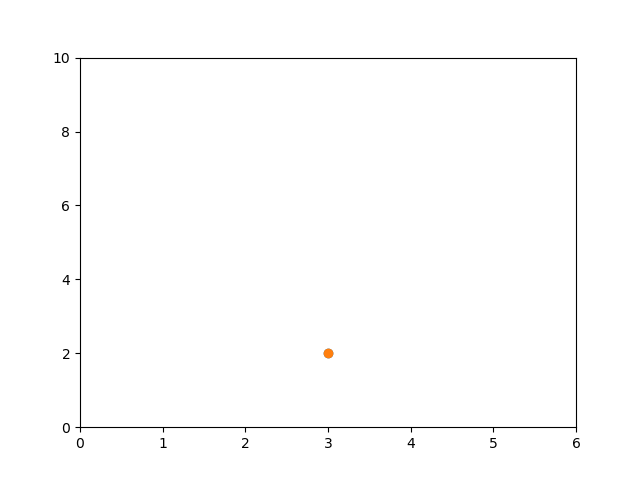

[0, 6, 0, 10]

In [48]:
plt.figure()         # Create a new figure
plt.plot(3,2,'o')    # Make a plot
ax = plt.gca()       # Grab the axis

# Set the x and y limits. We can do this using the axis function. 
# This function takes four parameters: a minimum value for x which we'll put zero, 
# a maximum value for x which we'll put at six. 
# Then, corresponding minimum and maximum values for y which we'll put at zero and 10.
ax.axis( [0,6,0,10] )  

Since we're doing this with the scripting layer, once we run the Jupyter cell, it renders to the nbagg backend as we might expect.

In [49]:
# plt.plot() returns axes for the figure
ret_ax = plt.plot(3,2,'o')
ret_ax

<IPython.core.display.Javascript object>


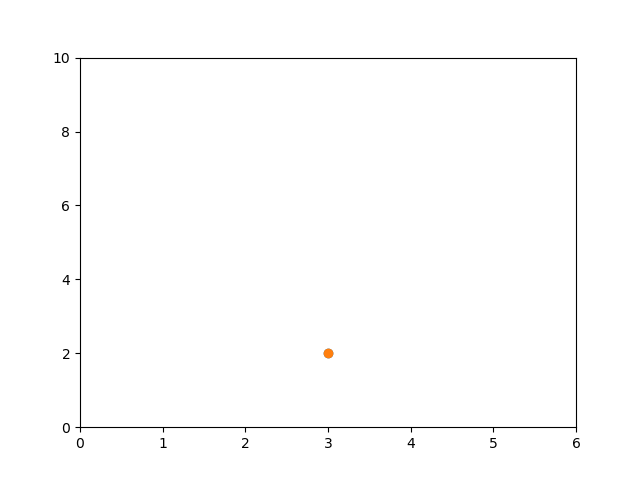

In [50]:
# gcf() to get current figure of pyplot
fig = plt.gcf()
fig

In [51]:
# gca() to get current axes
get_ax = plt.gca()
get_ax

You can add Artists to an axes object at any time. Pyplot is doing this for us when we call the plot function. It's determining what shape we want from the string, the location associated with that shape, that it's creating a patch object, and adding that to the axes. If we make subsequent calls to the plot function, this will add more data to our chart. 

<IPython.core.display.Javascript object>


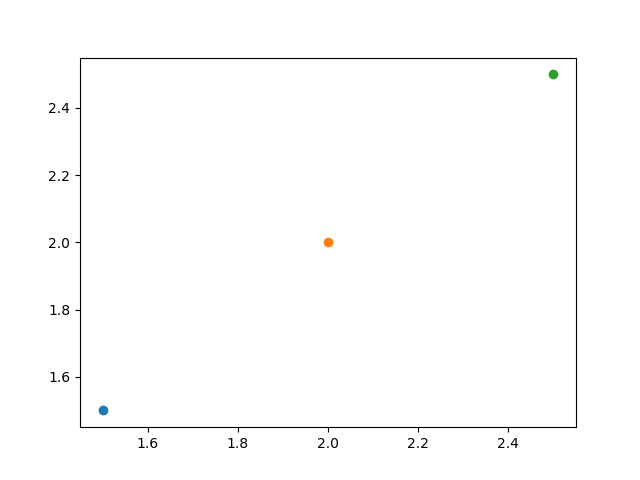

In [52]:
plt.figure()
plt.plot(1.5,1.5,'o')
plt.plot(2,2,'o')
plt.plot(2.5,2.5,'o')

You can see that when this is done, the points are rendered in different colors as the axes recognizes them as different data series.

In [53]:
# We can actually get all of the child objects that axes contains. 
get_ax.get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

__We can see that there's actually two line to the objects contained in this axes, these are our data points.__

__A number of spines which are actual renderings of the borders of the frame including tic markers, two axis objects, and a bunch of text which are the labels for the chart.A rectangle which is the background for the axes.__ 